## Goal

Here we explain how to load the bee trajectories and relate it to the experimental setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # To plot the result

## Loading data

### Loading summary

In [2]:
# an hdf file containing the camera obsveration
hdfdata_cameraobs = 'data/cameraobs.h5' 
summary = pd.read_hdf(hdfdata_cameraobs, key='summary')
summary.head()

Date      Time  Nest Object
beeid flight_num flight_id                                         
B002  0          FB002.1_150814   2014-08-15  07:49:01   5.0      7
G003  0          G003_Flight_0007 2016-08-19       NaN   5.0    NaN
      1          G003_Flight_0008 2016-08-19       NaN   5.0    NaN
      2          G003_Flight_0009 2016-08-19       NaN   5.0    NaN
      3          G003_Flight_0010 2016-08-19       NaN   5.0    NaN

The values in the Nest and Object columns correspond to the index of one of the 8 nest holes.
The Nest column indicates which nest hole is connected to hive. The others are blocked. The Object column indicate around which nest hole the objects have been placed.

### Loading nest position

The nest position can be acces in

In [3]:
hdfdata_trajectories = 'data/trajectories.h5'

In [4]:
nest_holes = pd.read_hdf(hdfdata_trajectories, key='nest_holes')
nest_holes.head()

x           y          z
nest_hole_index                                   
1                  4.498242  274.265076 -14.718750
2               -175.524628  185.912750 -18.311646
3               -239.488983   13.956919 -19.842529
4               -164.939117 -157.521194 -19.294312
5                 14.796738 -225.960220 -19.508301

### Loading trajectories

Bee of interest

In [5]:
beeid = 'Y101'
trajs = pd.read_hdf(hdfdata_trajectories, key=beeid)
trajs.head()

x           y          z  orientation
flight_id        frame                                              
Y101_Flight_0001 0      3.056267 -215.002853   9.296387      2.79751
                 1      4.611618 -215.020859   8.422241      2.80863
                 2      4.556609 -214.593582   9.183838      2.81407
                 3      4.643041 -213.830582  10.539551      2.82704
                 4      4.647236 -214.432541   7.458252      2.82896

Flight of interest

In [6]:
flight_id = 'Y101_Flight_0001'
trajs = trajs.xs(flight_id,level='flight_id')
trajs.head()

x           y          z  orientation
frame                                              
0      3.056267 -215.002853   9.296387      2.79751
1      4.611618 -215.020859   8.422241      2.80863
2      4.556609 -214.593582   9.183838      2.81407
3      4.643041 -213.830582  10.539551      2.82704
4      4.647236 -214.432541   7.458252      2.82896

Text(0, 0.5, 'y [mm]')

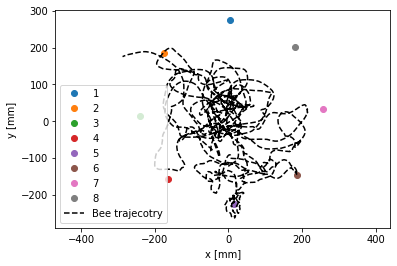

In [7]:
for ni, row in nest_holes.iterrows():
    plt.plot([row.x],[row.y], 'o', label='{}'.format(ni))
plt.plot(trajs.x,trajs.y,'k--',label='Bee trajecotry')
plt.axis('equal')
plt.legend()
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')